## Biblioteca para Monte Carlo

https://github.com/ranaroussi/pandas-montecarlo

Vamos executar uma simulação de Monte Carlo nos retornos da SPY (S&P 500 Spider ETF).
Primeiros, vamos fazer download dos dados do SPY e calcular os retornos diários.

from pandas_datareader import data

df = data.get_data_yahoo("SPY")
df['return'] = df['Adj Close'].pct_change().fillna(0)
print(df)

Agora, importaremos o pandas_montecarlo e executaremos uma simulação de monte carlo com 10 simulações (para simplificar a demo) e busto/rebaixamento máximo definido para -10.0% e limite de meta definido para +100.0% (defaults é >=0%)

In [60]:
import pandas_montecarlo
mc=df['return'].montecarlo(sims=10, bust=-0.1, goal=1)
print(mc)

<pandas_montecarlo.montecarlo.<locals>.__make_object__ object at 0x0000012C60B7F730>


Plot da simulação

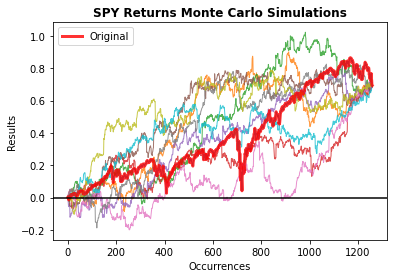

In [61]:
mc.plot(title='SPY Returns Monte Carlo Simulations') # optional: , figsize(x, y)

In [62]:
print(mc.stats)

{'min': 0.6934053976174758, 'max': 0.693405397617476, 'mean': 0.6934053976174759, 'median': 0.6934053976174758, 'std': 1.1702778228589004e-16, 'maxdd': -0.200456752814823, 'bust': 0.4, 'goal': 0.0}


In [63]:
print(mc.maxdd)

{'min': -0.200456752814823, 'max': -0.002111464646134542, 'mean': -0.08861941591175647, 'median': -0.07758934176283466, 'std': 0.06722426353199167}


In [64]:
print(mc.data.head())

   original         1         2         3         4         5         6  \
0  0.000000  0.003890 -0.001850  0.004099 -0.008148  0.000030  0.013496   
1 -0.001671  0.011975  0.000063  0.005964 -0.006555  0.002638  0.000386   
2  0.005524 -0.000945 -0.003889  0.000939 -0.020490 -0.002691  0.009351   
3 -0.000916 -0.001919 -0.001067 -0.001766 -0.017665 -0.006269 -0.001143   
4 -0.017744  0.004456 -0.007692  0.002108 -0.003725  0.002604  0.002785   

          7         8         9  
0 -0.001268 -0.008659  0.003077  
1  0.001322 -0.004108  0.006381  
2  0.004738  0.000599  0.002224  
3  0.003342  0.000386 -0.003209  
4  0.016088  0.007428 -0.000327  
